In [10]:
import os
print(os.listdir("../Data"))

['sampleSubmission.csv', 'test', 'train', 'trainLabels.csv']


In [3]:
import os.path
import itertools
from itertools import chain

In [4]:
import pandas as pd
import numpy as np

In [13]:
from PIL import Image
from zipfile import ZipFile
import h5py
import cv2
from tqdm import tqdm
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [15]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((32, 32), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [17]:
images = pd.read_csv('../Data/trainLabels.csv')
images = images.sample(20)
images['file'] = images.id.map(lambda id: f'../Data/train/{id}.png')
images['image'] = images.file.map(lambda f: get_thumbnail(f))
images.head()

,id,label,file,image
40386,40387,automobile,../Data/train/40387.png,<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x19EAADB0A20>
24123,24124,deer,../Data/train/24124.png,<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x19EAAB90048>
47885,47886,bird,../Data/train/47886.png,<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x19EAAB90EB8>
26963,26964,horse,../Data/train/26964.png,<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x19EAAB9A2E8>
6573,6574,horse,../Data/train/6574.png,<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x19EAAB9A358>


,label,image
40386,automobile,
24123,deer,
47885,bird,
26963,horse,
6573,horse,
157,dog,
7558,horse,
3012,bird,
31167,deer,
7827,automobile,

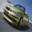
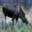
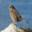
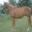
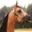
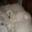
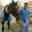
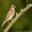
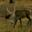
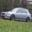
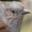
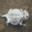
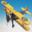
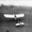
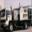
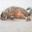
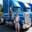
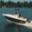
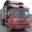
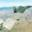

In [20]:
HTML(images[['label', 'image']].to_html(formatters={'image': image_formatter}, escape=False))